In [1]:
import sys
sys.path.insert(0, "/lupus2/mpound/pdrtpy")

In [2]:
import pdrutils as utils
from lineratiofit import LineRatioFit
from measurement import Measurement
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mpcolors
from matplotlib import ticker
from matplotlib.lines import Line2D
from astropy.visualization import simple_norm, ZScaleInterval , ImageNormalize
from astropy.visualization.stretch import SinhStretch,  LinearStretch
import matplotlib.cm as mcm
import numpy as np
import numpy.ma as ma


/home/mpound/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


In [3]:
print(utils.wolfire())
print(utils.model_dir())
print(utils.root_dir())

numerator denominator        label            filename     z 
--------- ----------- ------------------- --------------- ---
   OI_145       OI_63        OI_145/OI_63         oioiweb   1
   OI_145     CII_158      OI_145/CII_158      o145ciiweb   1
    OI_63     CII_158       OI_63/CII_158         oicpweb   1
  CII_158      CI_609      CII_158/CI_609     ciici609web   1
   CI_370      CI_609       CI_370/CI_609         ciciweb   1
  CII_158       CO_10       CII_158/CO_10        ciicoweb   1
   CI_609       CO_10        CI_609/CO_10         cicoweb   1
   CI_609       CO_21        CI_609/CO_21       cico21web   1
   CI_609       CO_32        CI_609/CO_32       cico32web   1
   CI_609       CO_43        CI_609/CO_43       cico43web   1
      ...         ...                 ...             ... ...
H200S2_Z3   H200S0_Z3 H200S2_Z3/H200S0_Z3   h200s2s0z3web   3
H200S2_Z1   H200S1_Z1 H200S2_Z1/H200S1_Z1   h200s2s1z1web   1
H200S2_Z3   H200S1_Z3 H200S2_Z3/H200S1_Z3   h200s2s1z3web   3
H200S3_Z

In [4]:
p = LineRatioFit()

In [5]:
dir="/home/mpound/Dropbox/PDRmodels/"
cii_flux_file=dir+"n22_cii_convol_mips70.fits"
cii_err_file=dir+"n22_cii_err_convol_mips70.fits"
cii_combined_file="n22_cii_flux_error.fits"
oi_flux_file=dir+"n22_oi_regrid_convol_mips70.fits"
oi_combined_file="n22_oi_flux_error.fits"
oi_err_file=dir+"n22_oi_err_regrid_convol_mips70.fits"
TIR_flux_file=dir+"n22_TIR.fits"
TIR_combined_file="n22_TIR__flux_error.fits"
Measurement.makemeasurement(cii_flux_file,cii_err_file,cii_combined_file)
Measurement.makemeasurement(oi_flux_file,oi_err_file,oi_combined_file)
#Measurement.makemeasurement(TIR_flux_file,errorfile='rms',outfile=TIR_combined_file,rms=3E-6)
Measurement.makemeasurement(TIR_flux_file,error='10%',outfile=TIR_combined_file)
m1 = Measurement.read(cii_combined_file,identifier="CII_158")
m2 = Measurement.read(TIR_combined_file,identifier="FIR")
m3 = Measurement.read(oi_combined_file,identifier="OI_63")
p.addMeasurement([m1,m2,m3])

(139, 81)
(139, 81)
(139, 81)


In [6]:
p.run()

OI_63+CII_158/FIR
G0 shape  (4768,)
N shape  (4768,)


/lupus2/mpound/pdrtpy/lineratiofit.py:385: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.g0_map.data[spatial_idx]=g0
/lupus2/mpound/pdrtpy/lineratiofit.py:388: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.n_map.data[spatial_idx]=n


In [7]:
#gh=utils.toHabing(p.g0_map)
p.g0_map.uncertainty = None
p.n_map.uncertainty=None

In [8]:
if False:
    plt.rcParams["figure.dpi"] = 100
    plt.subplot(1,2,1,projection=gh.wcs)
    current_cmap = mcm.get_cmap('rainbow')
    current_cmap.set_bad(color='white')
    plt.imshow(gh,cmap=current_cmap,origin='lower')
    plt.title("G0")
    plt.colorbar()
    plt.subplot(1,2,2,projection=p.g0_map.wcs)
    f=plt.imshow(utils.to('Mathis',p.g0_map),cmap=current_cmap,origin='lower')
    plt.title("G0")
    plt.colorbar()

In [9]:
from plot import LineRatioPlot

In [10]:
pp = LineRatioPlot(p)

<class 'numpy.ma.core.MaskedArray'>
autolev min 0.001778 max 0.177828
Autolevels got 6 levels [0.00177828 0.00446684 0.01122019 0.02818383 0.07079458 0.17782795]


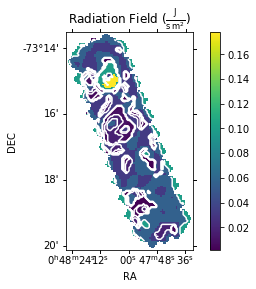

In [11]:
#gh.wcs.wcs
#from astropy.visualization import simple_norm, ZScaleInterval , ImageNormalize
#from astropy.visualization.stretch import SinhStretch,  LinearStretch, SqrtStretch
#norm= ImageNormalize(km,ZScaleInterval(contrast=1),stretch=LinearStretch())
pp.radiationField(units='J s^-1 m^-2',cmap='viridis',image=True,contours=True)
#levels=[  876.86364746,  2202.58189834 , 5532.63558473 ,13897.35225577 ,34908.57056519, 87686.36474609]
#pp.radiationField(units='Mathis',norm=None,cmap='rainbow',image=True,contours=True,levels=levels)

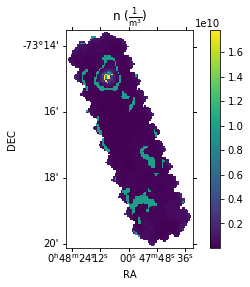

In [12]:
pp.density(units='m^-3',cmap='viridis',image=True,contours=False)
#p.g0_map.unit.to_string('latex')

<class 'numpy.ma.core.MaskedArray'>
autolev min 0.006319 max 0.026706
Autolevels got 5 levels [0.00631866 0.00905985 0.01299022 0.01862569 0.02670595]


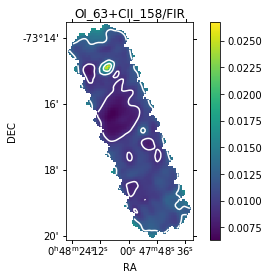

In [13]:
pp.observedratio('OI_63+CII_158/FIR',contours=True,image=True)

In [ ]:
#pp.reducedChisq()

In [ ]:
if False:
    from astropy.visualization import simple_norm, ZScaleInterval , ImageNormalize
    from astropy.visualization.stretch import SinhStretch,  LinearStretch
    import matplotlib.cm as mcm
    import numpy as np
    import numpy.ma as ma

    k=utils.to('Mathis',p.g0_map)
    km = ma.masked_invalid(k)
    min_ = km.min()
    max_ = km.max()
    ax=pp._plt.subplot(111,projection=k.wcs,aspect='equal')
    normalizer=simple_norm(km, min_cut=min_,max_cut=max_, stretch='log', clip=False)
    current_cmap = mcm.get_cmap('rainbow')
    current_cmap.set_bad(color='white')
    pp._plt.imshow(km,cmap=current_cmap,origin='lower',norm=None)
    ax.contour(km,levels=levels,origin='lower',colors='white')